# Task 1: Introduction

Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

### Import TensorFlow

In [2]:
# Import TensorFlow and set the logging verbosity to error level.
import tensorflow as tf


print('Using TensorFlow version', tf.__version__)


Using TensorFlow version 2.15.0


# Task 2: The Dataset
### Import MNIST

In [3]:
# Import the MNIST dataset from TensorFlow Keras datasets.
from tensorflow.keras.datasets import mnist

# Load the dataset into training and testing sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [4]:
# Print the shapes of the loaded arrays to understand the dataset structure.
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


### Plot an Image Example

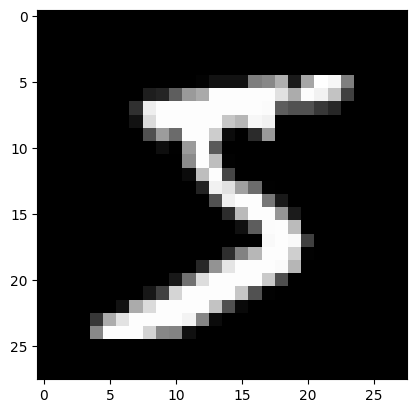

In [5]:
# Plot an example image from the training set to visualize the data.
from matplotlib import pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.show()

### Display Labels

In [6]:
y_train[0]

5

In [7]:
# Display the unique labels in the training set to understand the classification categories.
print('Unique labels in y_train:', set(y_train))


Unique labels in y_train: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [8]:
# Convert labels to one-hot encoded format for compatibility with categorical crossentropy loss.
from tensorflow.keras.utils import to_categorical


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [9]:
# Validate the shapes of the encoded labels arrays.
print('y_train_encoded shape:', y_train_encoded.shape)
print('y_test_encoded shape:', y_test_encoded.shape)

# Display an example of an encoded label.
print('Example of encoded label:', y_train_encoded[0])

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)
Example of encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Display Encoded Labels

In [10]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [11]:
# Unroll the 28x28 images into 784-dimensional vectors.
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train reshaped:', x_train_reshaped.shape)
print('x_test reshaped:', x_test_reshaped.shape)




x_train reshaped: (60000, 784)
x_test reshaped: (10000, 784)


### Display Pixel Values

In [12]:
# Display the unique pixel values in the first test image after reshaping.
print('Unique pixel values in the first test image:', set(x_test_reshaped[0]))

Unique pixel values in the first test image: {0, 129, 1, 3, 133, 5, 9, 140, 14, 17, 18, 19, 21, 22, 151, 159, 31, 163, 36, 35, 166, 38, 40, 170, 44, 52, 182, 185, 58, 59, 60, 187, 62, 57, 61, 66, 67, 198, 72, 75, 203, 205, 77, 207, 209, 83, 84, 219, 221, 222, 224, 225, 121, 227, 126, 229, 233, 106, 236, 238, 240, 241, 114, 115, 242, 248, 249, 250, 251, 253, 254, 255}


### Data Normalization

In [13]:
# Normalize the pixel values of the images to have a mean of 0 and standard deviation of 1.
epsilon = 1e-10
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)



### Display Normalized Pixel Values

In [14]:
# Display the unique normalized pixel values in the first training image.
print('Unique normalized pixel values in the first training image:', set(x_train_norm[0]))


Unique normalized pixel values in the first training image: {-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773

# Task 6: Creating a Model
### Creating the Model

In [15]:
# Define a Sequential model with two dense hidden layers and an output layer with softmax activation.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [16]:
# Compile the model specifying the optimizer, loss function, and metrics to track.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model to check its architecture.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [17]:
# Train the model on the normalized training set.
model.fit(x_train_norm, y_train_encoded, epochs=3)



Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3609 - accuracy: 0.8953
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1832 - accuracy: 0.9470
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9591


### Evaluating the Model

In [ ]:
# Evaluate the model on the normalized test set and print the accuracy.
_, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Test set accuracy:', accuracy * 100)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.1284 - acc: 0.9590
Test set accuracy:  95.89999914169312


# Task 8: Predictions

### Predictions on Test Set

In [18]:
# Make predictions on the normalized test set.
predictions = model.predict(x_test_norm)
print('Shape of predictions:', predictions.shape)


313/313 [==============================] - 1s 2ms/step
Shape of predictions: (10000, 10)


### Plotting the Results

In [ ]:
# Plot the first 25 test images, their predicted labels, and the true labels.
# Color the predictions in green if correct, and red if incorrect.
plt.figure(figsize=(12, 12))
start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred = np.argmax(predictions[start_index + i])
    ground_truth = y_test[start_index + i]

In [ ]:
plt.plot(predictions[8])
plt.show()